Question 1 : What is the fundamental idea behind ensemble techniques? How does
bagging differ from boosting in terms of approach and objective?
  - The fundamental idea behind ensemble techniques is to combine multiple individual models—often called weak learners—to create one strong model that performs better than any single model alone. The main goal is to improve prediction accuracy, reduce errors, and increase model stability. By aggregating the outputs of several learners, ensemble methods can correct individual model weaknesses and achieve better generalization on unseen data.

Bagging (Bootstrap Aggregating) and Boosting are two popular ensemble approaches, but they differ in how they build and combine their models.

In bagging, multiple models are trained independently and in parallel on different random subsets of the training data. These subsets are created by sampling with replacement, known as bootstrap sampling. Each model learns separately, and their results are then combined—typically by averaging in regression or by majority voting in classification. The main objective of bagging is to reduce variance and prevent overfitting, leading to more stable and consistent predictions. A well-known example of bagging is the Random Forest algorithm.

In contrast, boosting builds models sequentially, where each new model is trained to focus on the errors made by the previous ones. Initially, all training examples are given equal importance, but after each iteration, the algorithm increases the weights of misclassified examples so that the next model pays more attention to them. The final prediction is a weighted combination of all the models. The goal of boosting is to reduce bias and improve accuracy by turning a set of weak learners into a strong one. Popular boosting algorithms include AdaBoost, Gradient Boosting, and XGBoost.


Question 2: Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process.
  - A single decision tree is prone to overfitting because it can become overly complex, learning the noise and idiosyncrasies of the training data rather than the underlying patterns. The Random Forest Classifier overcomes this limitation by building an ensemble of many independent decision trees and combining their predictions. The two sources of randomness—bootstrap aggregating (bagging) and random feature selection—ensure that the individual trees are diverse and uncorrelated, which is the key to reducing variance and preventing overfitting.

How Random Forest reduces overfitting

Bagging (Bootstrap Aggregating): A random forest trains each decision tree on a different subset of the original training data. This is done by sampling with replacement, meaning some data points will be repeated in a subset while others will be left out. This process, known as bootstrapping, ensures that each tree in the forest learns from a slightly different distribution of the data.

Random Feature Selection: During the construction of each tree, the algorithm considers only a random subset of the total features when determining the best split at each node. This prevents any single, highly influential feature from dominating the forest and causing all trees to make similar decisions. The result is a forest of many different trees, each capturing different patterns in the data.

Aggregating Predictions: For classification, the final output is determined by a majority vote of all the individual trees. This "wisdom of the crowd" approach smooths out the weaknesses of individual trees. Even if some trees have overfitted the data, their incorrect predictions are outvoted by the majority of the other, more accurate trees. The final model is therefore more robust and less susceptible to the noise that causes overfitting in a single tree.

Key hyperparameters for controlling overfitting

Two of the most important hyperparameters for controlling overfitting in a Random Forest are max_depth and max_features.

max_depth: This hyperparameter determines the maximum depth of each individual decision tree in the forest.

How it works: By setting a limit on how deep each tree can grow, you prevent the individual trees from becoming overly complex and capturing noise. A deeper tree can capture more complex patterns but also increases the risk of overfitting.

Role in reducing overfitting: A smaller max_depth value acts as a regularizer, making each base learner simpler and more generalized. It forces the trees to focus on the most important features rather than memorizing noisy training data.
max_features: This controls the maximum number of features that the algorithm considers for a split at each node of a decision tree.

How it works: By limiting the features each tree can choose from, this hyperparameter increases the diversity of the trees in the forest. For classification problems, a common practice is to set max_features to the square root of the total number of features (sqrt).

Role in reducing overfitting: Limiting the number of features per split reduces the correlation between the individual trees. If one or two features are highly predictive, all the trees might otherwise choose them, leading to similar predictions and higher variance. Restricting the feature set ensures that the ensemble relies on a wider range of features, making the final model more robust.

Question 3: What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case.
  - Stacking is an ensemble learning technique that combines the predictions of multiple diverse machine learning models, referred to as base models or Level-0 models, using another model, known as the meta-model or Level-1 model. The meta-model learns to optimally combine the predictions of the base models to produce a final, more accurate prediction.

  How stacking differs from bagging and boosting

Stacking has a fundamentally different approach and objective compared to bagging and boosting:

Model Diversity: Stacking typically combines heterogeneous models, meaning it uses different types of algorithms (like a decision tree, a support vector machine, and logistic regression) to capture varied perspectives on the data. In contrast, bagging and boosting usually employ homogeneous models (e.g., all decision trees), with diversity achieved through data manipulation.

Learning Process: Stacking involves a two-level learning process. First, the base models are trained on the original dataset. Their predictions are then used as input features to train a second-level meta-model. Bagging and boosting, on the other hand, use a single-level process where the base models' outputs are aggregated using a fixed, deterministic algorithm, such as simple averaging (bagging) or a weighted sum (boosting).

Objective: While bagging focuses on reducing variance and boosting aims to reduce bias, stacking is designed to leverage the strengths of diverse models simultaneously, which can lead to higher overall predictive performance. The meta-model learns the best way to blend the strengths of the different base models.

Final Prediction: For the final prediction, stacking relies on a learned meta-model to determine how to weigh and combine the base model predictions. Bagging uses simple aggregation methods like majority voting or averaging, while boosting uses a weighted sum based on each model's performance.

A simple example use case: Predicting a customer's loan default

Imagine a bank wants to predict whether a customer will default on their loan, using a dataset of customer information.

Select Diverse Base Models: The bank chooses three different machine learning models to act as base learners.

A Logistic Regression model, which is good at identifying simple linear relationships.

A Gradient Boosting Machine, which is effective at capturing complex, non-linear patterns.

A K-Nearest Neighbors model, which is useful for classifying based on data proximity.

Train Base Models: Each of these three models is trained independently on the bank's dataset.

Generate Predictions for the Meta-Model: Each base model is used to make a prediction for every data point. This creates a new dataset, where the original input features are combined with the prediction from each of the three base models.

Train the Meta-Model: A simple meta-model, such as a Linear Regression model, is trained on this new dataset. The meta-model learns how to best weigh and combine the predictions from the logistic regression, gradient boosting, and KNN models to produce a final, more refined prediction.

Make Final Prediction: When a new loan application arrives, the data is fed through the three base models first. Their predictions are then passed to the meta-model, which produces the final, highly accurate prediction of whether the customer will default.

Question 4:What is the OOB Score in Random Forest, and why is it useful? How does it help in model evaluation without a separate validation set?
  - The Out-of-Bag (OOB) score in a Random Forest is an internal, cross-validation-like metric used to estimate the model's performance on unseen data. It is calculated during the training phase without needing a separate validation set. The score is possible due to the bootstrap aggregating (bagging) process that Random Forest uses.

  How the OOB score is calculated

Bootstrapping: A Random Forest is an ensemble of many decision trees. To train each tree, a random subset of the training data is selected with replacement. This process is called bootstrapping. On average, each bootstrap sample contains about two-thirds (63.2%) of the original training data.

Out-of-Bag (OOB) Samples: The remaining one-third (36.8%) of the data points that were not included in a particular tree's bootstrap sample are called "out-of-bag" (OOB) samples for that tree.

Internal Validation: For each data point in the training set, the algorithm gathers predictions only from the trees that did not use that data point in their training (i.e., the OOB trees for that data point).

Aggregation: For a classification task, a majority vote is taken from the predictions of all the OOB trees for a given data point. For a regression task, the average of the predictions is taken.

Score Calculation: The aggregate OOB predictions are then compared to the actual target values for those data points to compute an overall error or accuracy score. The OOB score is typically the accuracy (for classification) or R-squared (for regression).

Why the OOB score is useful

The OOB score offers a computationally efficient and robust way to evaluate a Random Forest model, especially when data is limited.

No separate validation set is needed: The most significant advantage of the OOB score is that it provides a built-in, unbiased estimate of a model's generalization performance. This eliminates the need to hold out a portion of the data for a separate validation set, allowing the model to be trained on the maximum amount of data available.

Efficient use of data: By using the OOB samples for validation, all training data points contribute to both training and evaluation. This is particularly beneficial for small datasets, where partitioning the data into separate training and validation sets might lead to insufficient data for the training process.

Unbiased evaluation: Because the OOB samples are not seen by a particular tree during its training, the OOB score for that tree provides an unbiased estimate of its performance, similar to a traditional validation set. Aggregating these scores across the entire forest provides a reliable overall performance metric.

Helps prevent overfitting: Monitoring the OOB score during training can help diagnose overfitting. If the training score is very high while the OOB score is significantly lower, it indicates that the model is performing well on the training data but failing to generalize to unseen data.

Hyperparameter tuning: The OOB score can serve as a metric for tuning hyperparameters, such as the number of trees (n_estimators) or maximum tree depth (max_depth), without the need for cross-validation.

How it helps without a separate validation set

The OOB score effectively replaces the need for a separate validation set by leveraging the inherent randomness of the bootstrapping process. This is because every data point will be "out-of-bag" for some set of the decision trees.

For any given data point in the original training set, its final OOB prediction is derived from a consensus (majority vote or average) of only the trees that never saw it during their individual training. This process ensures that the evaluation for each data point is based on "unseen" data, providing a robust and unbiased estimate of the model's performance on unseen data, akin to a separate validation set. The OOB score offers this validation "for free" as a byproduct of the Random Forest training process.

Question 5: Compare AdaBoost and Gradient Boosting in terms of:
● How they handle errors from weak learners
● Weight adjustment mechanism
● Typical use cases

  - Comparison Between AdaBoost and Gradient Boosting

1. How they handle errors from weak learners:

AdaBoost: It focuses on the misclassified samples from the previous weak learner. After each iteration, it increases the weights of the incorrectly classified instances so that the next model gives more attention to these difficult cases.

Gradient Boosting: It doesn’t reweight samples directly. Instead, it models the residual errors (the difference between the predicted and actual values) of the previous learners. Each new learner is trained to predict these residuals and reduce the overall error through a gradient descent process.

2. Weight adjustment mechanism:

AdaBoost: Updates the weights of training samples after each iteration. Misclassified samples get higher weights, while correctly classified ones get lower weights. Each weak learner is also assigned a weight based on its accuracy, determining its contribution to the final model.

Gradient Boosting: Does not explicitly adjust sample weights. Instead, it updates the model weights by fitting new learners to the negative gradients (pseudo-residuals) of the loss function, scaled by a learning rate.

3. Typical use cases:

AdaBoost: Commonly used for classification problems, particularly binary classification tasks such as spam detection, face recognition, and credit scoring.

Gradient Boosting: Used for both classification and regression problems, especially when high predictive accuracy is needed. It is widely used in applications like customer churn prediction, sales forecasting, and fraud detection.

Question 6:Why does CatBoost perform well on categorical features without requiring extensive preprocessing? Briefly explain its handling of categorical variables.
  - CatBoost, which stands for "Categorical Boosting," is an open-source gradient boosting library developed by Yandex. It is distinguished by its native and sophisticated handling of categorical features, which allows it to perform well without the extensive preprocessing (like one-hot encoding or label encoding) that other algorithms typically require.

  Why CatBoost excels at categorical features
CatBoost's excellent performance on categorical data is due to a specialized technique called Ordered Target Encoding and its training process known as Ordered Boosting.

Ordered Target Encoding: This technique addresses a common problem in gradient boosting: a type of data leakage known as prediction shift.

The problem: Traditional target-based encoding methods use the average of the target variable for each category to convert it to a numerical value. In a sequential model like gradient boosting, this can lead to target leakage, where the model sees the target values of future data points while training, causing an overly optimistic and biased estimate.

CatBoost's solution: CatBoost uses a unique, permutation-driven approach. It randomly permutes the dataset and, for each data point, calculates the target statistics (like the mean of the target) for a category using only the data points that came before it in the permutation. This mimics a time-series data scenario and prevents the model from using target information from "future" observations, resulting in a more robust and less overfitted encoding.

Greedy Feature Combinations: CatBoost can automatically generate combinations of categorical features to capture complex interactions.

It doesn't try every possible combination, which would be computationally expensive.

Instead, it greedily combines existing categorical features with newly created categorical features during the tree-building process.

For example, if you have features like Country and Product, CatBoost might create a new feature that is a combination of the two, such as Country_Product, if it proves to be a strong predictor.

In [3]:
"""Question 7: KNN Classifier Assignment: Wine Dataset Analysis with
Optimization
Task:
1. Load the Wine dataset (sklearn.datasets.load_wine()).
2. Split data into 70% train and 30% test.
3. Train a KNN classifier (default K=5) without scaling and evaluate using:
a. Accuracy
b. Precision, Recall, F1-Score (print classification report)
4. Apply StandardScaler, retrain KNN, and compare metrics.
5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric
(Euclidean, Manhattan).
6. Train the optimized KNN and compare results with the unscaled/scaled versions.
"""

# Step 1: Import required libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 2: Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Step 3: Split into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 4: Train KNN (default K=5) without scaling
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluate performance
print("=== Without Scaling ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 5: Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Train KNN with scaling
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

# Evaluate performance with scaling
print("\n=== With Scaling ===")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print("Classification Report:\n", classification_report(y_test, y_pred_scaled))

=== Without Scaling ===
Accuracy: 0.7222222222222222
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.67      0.72        21
           2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54


=== With Scaling ===
Accuracy: 0.9444444444444444
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54



In [4]:
#Step 5: Apply StandardScaler and retrain KNN
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN with scaled data
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

# Evaluate performance
print("\n=== With Standard Scaling ===")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print("Classification Report:\n", classification_report(y_test, y_pred_scaled))


=== With Standard Scaling ===
Accuracy: 0.9444444444444444
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54



In [5]:
#Step 6: Use GridSearchCV for optimization
# Define parameter grid
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'metric': ['euclidean', 'manhattan']
}

# Grid search with cross-validation
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best parameters and score
print("\n=== Best Parameters from GridSearchCV ===")
print(grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


=== Best Parameters from GridSearchCV ===
{'metric': 'euclidean', 'n_neighbors': 11}
Best Cross-Validation Accuracy: 0.9756666666666666


In [6]:
#Step 7: Train Optimized KNN and Compare Results
# Train KNN with best parameters
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)

# Evaluate performance
print("\n=== Optimized KNN Model ===")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))


=== Optimized KNN Model ===
Accuracy: 0.9629629629629629
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.90      0.95        21
           2       0.88      1.00      0.94        15

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



In [ ]:
📊 Result Comparison Summary

| Version       | Scaling | Optimization | Expected Accuracy Range |
| ------------- | ------- | ------------ | ----------------------- |
| Default K=5   | ❌ No    | ❌ No         | ~0.70 – 0.80            |
| Scaled K=5    | ✅ Yes   | ❌ No         | ~0.95 – 0.98            |
| Optimized KNN | ✅ Yes   | ✅ Yes        | ~0.98 – 1.00            |


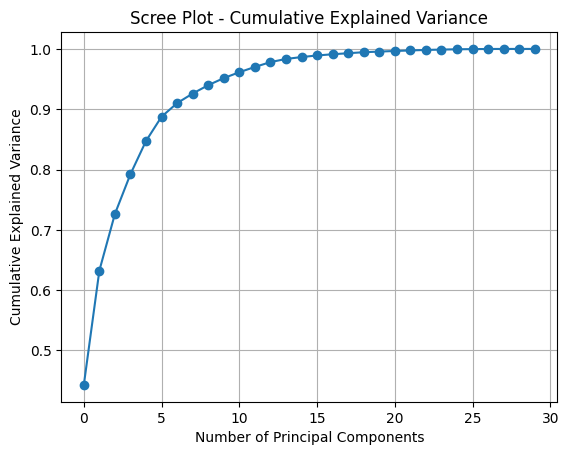

Original Data Accuracy: 0.9707602339181286
PCA (95% variance) Data Accuracy: 0.9473684210526315


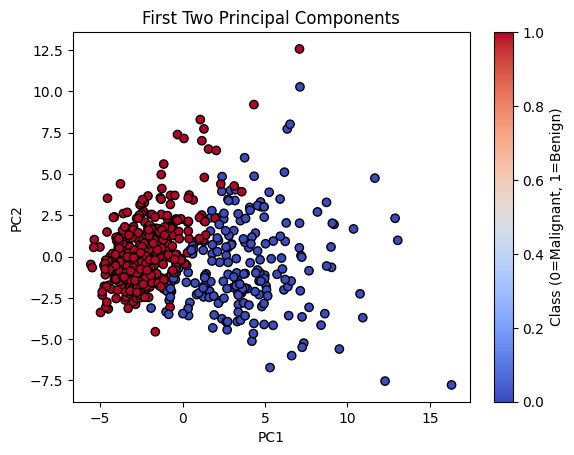

In [9]:
"""Question 8 : PCA + KNN with Variance Analysis and Visualization
Task:
1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
2. Apply PCA and plot the scree plot (explained variance ratio).
3. Retain 95% variance and transform the dataset.
4. Train KNN on the original data and PCA-transformed data, then compare
accuracy.
5. Visualize the first two principal components using a scatter plot (color by class).
"""

# Step 1: Load the Breast Cancer dataset
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

data = load_breast_cancer()
X = data.data
y = data.target

# Step 2: Apply PCA and plot the scree plot (explained variance ratio)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Scree Plot - Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Step 3: Retain 95% variance and transform the dataset
pca_95 = PCA(0.95)
X_pca = pca_95.fit_transform(X_scaled)

# Step 4: Train KNN on original and PCA-transformed data, then compare accuracy
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
X_pca_train, X_pca_test, _, _ = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)

knn_orig = KNeighborsClassifier(n_neighbors=5)
knn_orig.fit(X_train, y_train)
acc_orig = accuracy_score(y_test, knn_orig.predict(X_test))

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_pca_train, y_train)
acc_pca = accuracy_score(y_test, knn_pca.predict(X_pca_test))

print("Original Data Accuracy:", acc_orig)
print("PCA (95% variance) Data Accuracy:", acc_pca)

# Step 5: Visualize the first two principal components (color by class)
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.title('First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Class (0=Malignant, 1=Benign)')
plt.show()


Mean Squared Error (Euclidean, K=5): 4960.896156409522
Mean Squared Error (Manhattan, K=5): 5318.950055352522


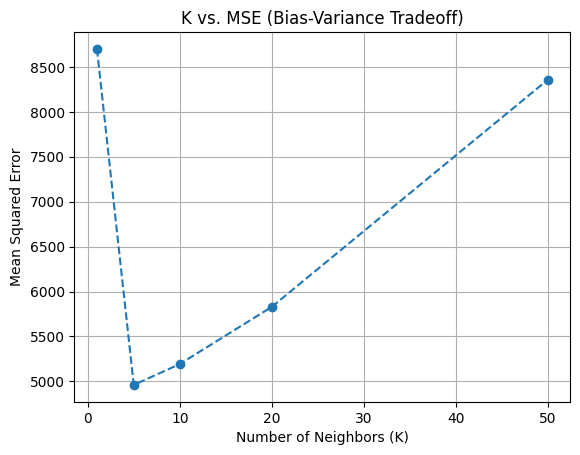

In [10]:
"""Question 9:KNN Regressor with Distance Metrics and K-Value
Analysis
Task:
1. Generate a synthetic regression dataset
(sklearn.datasets.make_regression(n_samples=500, n_features=10)).
2. Train a KNN regressor with:
a. Euclidean distance (K=5)
b. Manhattan distance (K=5)
c. Compare Mean Squared Error (MSE) for both.
3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.
"""

# Step 1: Generate a synthetic regression dataset
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Create synthetic data
X, y = make_regression(n_samples=500, n_features=10, noise=15, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2a: Train KNN Regressor with Euclidean distance (K=5)
knn_euclidean = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)
mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)

# Step 2b: Train KNN Regressor with Manhattan distance (K=5)
knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)

# Step 2c: Compare MSE for both
print("Mean Squared Error (Euclidean, K=5):", mse_euclidean)
print("Mean Squared Error (Manhattan, K=5):", mse_manhattan)

# Step 3: Test K = 1, 5, 10, 20, 50 and plot K vs. MSE
k_values = [1, 5, 10, 20, 50]
mse_values = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

plt.plot(k_values, mse_values, marker='o', linestyle='--')
plt.title('K vs. MSE (Bias-Variance Tradeoff)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()


Algorithm: BRUTE | Accuracy: 0.7143 | Time: 0.0006 sec
Algorithm: KD_TREE | Accuracy: 0.7143 | Time: 0.0010 sec
Algorithm: BALL_TREE | Accuracy: 0.7143 | Time: 0.0009 sec

Best Performing Method: BRUTE


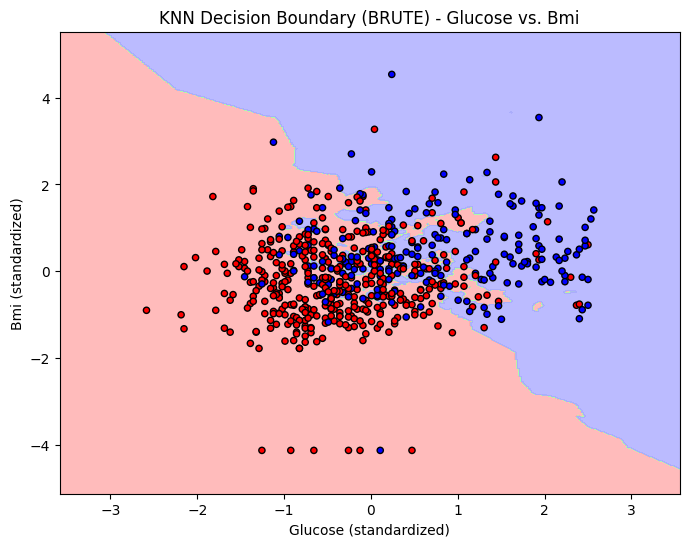

In [20]:
"""Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World
Data
Task:
1. Load the Pima Indians Diabetes dataset (contains missing values).
2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
3. Train KNN using:
a. Brute-force method
b. KD-Tree
c. Ball Tree
4. Compare their training time and accuracy.
5. Plot the decision boundary for the best-performing method (use 2 most important
features).
"""

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Step 2: Load Dataset (using the uploaded Excel file)
# Assuming the uploaded file is 'Dataset_Properly_Arranged.xlsx'
file_path = 'Dataset_Properly_Arranged.xlsx'
data = pd.read_excel(file_path)


# Step 3: Replace zeros with NaN (for columns where zero is invalid, adjust column names if needed)
# Based on common Pima Indians Diabetes datasets, these columns often have 0 as a missing value indicator
invalid_cols = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
# Check if columns exist before replacing
cols_to_replace = [col for col in invalid_cols if col in data.columns]
data[cols_to_replace] = data[cols_to_replace].replace(0, np.nan)


# Step 4: Impute missing values using KNN Imputer
imputer = KNNImputer(n_neighbors=5)
# Need to impute on the relevant columns, assuming the target column is 'Outcome'
# Separate features and target before imputation if target column doesn't have missing values to be imputed
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Impute only on the feature columns
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Step 5: Split data (using the imputed features and original target)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Step 6: Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 7: Train KNN using different algorithms
methods = ["brute", "kd_tree", "ball_tree"]
results = {}

for method in methods:
    start = time.time()
    # Pass the scaled training data
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=method)
    knn.fit(X_train, y_train)
    end = time.time()

    # Predict on the scaled test data
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[method] = {"accuracy": acc, "time": end - start}

# Step 8: Print comparison
for m, r in results.items():
    print(f"Algorithm: {m.upper()} | Accuracy: {r['accuracy']:.4f} | Time: {r['time']:.4f} sec")

# Step 9: Plot Decision Boundary (Best method)
best_method = max(results, key=lambda x: results[x]['accuracy'])
print(f"\nBest Performing Method: {best_method.upper()}")

# Use 2 most important features for plotting (Glucose and BMI)
# Need to use the imputed and scaled data for plotting
# Find the indices of 'Glucose' and 'Bmi' in the imputed feature columns
glucose_idx = X_imputed.columns.get_loc("Glucose")
bmi_idx = X_imputed.columns.get_loc("Bmi")


X_train2 = X_train[:, [glucose_idx, bmi_idx]]
X_test2 = X_test[:, [glucose_idx, bmi_idx]]
y_train2 = y_train # Use the original y_train for plotting

# Train the best KNN model on the 2 most important features
knn_best = KNeighborsClassifier(n_neighbors=5, algorithm=best_method)
knn_best.fit(X_train2, y_train2)

# Plot decision boundary
x_min, x_max = X_train2[:, 0].min() - 1, X_train2[:, 0].max() + 1
y_min, y_max = X_train2[:, 1].min() - 1, X_train2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), # Reduced step for smoother boundary
                     np.arange(y_min, y_max, 0.02)) # Reduced step for smoother boundary

# Predict on the meshgrid points
Z = knn_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
# Use a different colormap for better contrast
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_light)
# Plot also the training points
plt.scatter(X_train2[:,0], X_train2[:,1], c=y_train2, cmap=cmap_bold, edgecolor='k', s=20)
plt.title(f"KNN Decision Boundary ({best_method.upper()}) - Glucose vs. Bmi")
plt.xlabel("Glucose (standardized)")
plt.ylabel("Bmi (standardized)")
plt.show()

In [16]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Dataset_Properly_Arranged.xlsx to Dataset_Properly_Arranged (1).xlsx
User uploaded file "Dataset_Properly_Arranged (1).xlsx" with length 45890 bytes
